#### IE 3034 - Sistemas de Control 2
#### Eduardo Santizo
#### Gabriela Iriarte
### Simulación de COVID 19

The last update of these files was made on April 18, 2020 (11:15, London time).
https://ourworldindata.org/coronavirus-source-data

La data de los recuperados es de aquí:
https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases

Se descargó el archivo publicado el 18/04/2020 a las 11am Guatemala y el archivo publicado el 19/04/2020 a las 11:52 am (GMT-6) para obtener los datos actualizados hasta el 18/04/2020 pues la base de datos anterior contaba con los datos hasta esta fecha (our world data) mientras que a este (humdata) le faltaba el dato del 18 de abril.

Otra pág de una web similar es esta:
https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data



In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


direc = "C:/Users/Gaby/Documents/5A1S/control2/Covid19/"
general = os.path.join(direc,'owid-covid-data.csv')
recuperados = os.path.join(direc,'time_series_covid19_recovered_global.csv')
recuperados_18 = os.path.join(direc,'time_series_covid19_recovered_global_18.csv')

df = pd.read_csv(general, sep=",",encoding = 'latin_1')
df_rec = pd.read_csv(recuperados, sep=",",encoding = 'latin_1', error_bad_lines=False)
df_rec_18 = pd.read_csv(recuperados_18, sep=",",encoding = 'latin_1', error_bad_lines=False)

b'Skipping line 244: expected 91 fields, saw 92\n'


In [28]:
df_CHN = df[df['location']=='China'][['location','date','total_cases','new_cases','total_deaths']]
df_GTM = df[df['location']=='Guatemala'][['location','date','total_cases','new_cases','total_deaths']]
df_IT = df[df['location']=='Italy'][['location','date','total_cases','new_cases','total_deaths']]


In [54]:
val_it = df_rec_18[df_rec_18['Country/Region']=='Italy'][['4/18/20']]
val_chn = df_rec_18[df_rec_18['Country/Region']=='China'][['4/18/20']].sum(axis = 0, skipna = True)


In [55]:
# Arreglando db de los recuperados en Guatemala
df_rec.columns
GTM_rec = df_rec[df_rec['Country/Region']=='Guatemala']
GTM_rec = GTM_rec.iloc[0,57:]#.transpose()
GTM_rec.name = "recovered"
GTM_rec = pd.DataFrame(GTM_rec[0:])
GTM_rec.index.name = 'date'
GTM_rec.reset_index(inplace=True)
df_extra = pd.DataFrame({"date":["2020-04-18"],"recovered":[21]})
GTM_rec = GTM_rec.append(df_extra)

# Arreglando db de los recuperados en Italia
IT_rec = df_rec[df_rec['Country/Region']=='Italy']
IT_rec = IT_rec.iloc[0,4:] # En el 34
IT_rec.name = "recovered"
IT_rec = pd.DataFrame(IT_rec[0:])
IT_rec.index.name = 'date'
IT_rec.reset_index(inplace=True)
df_extra = pd.DataFrame({"date":["2020-04-18"],"recovered":[44927]})
IT_rec = IT_rec.append(df_extra)
#original_date = df_CHN['date']
#orig = pd.Series(np.zeros(53),index=original_date.iloc[0:53])
#IT_rec = pd.concat([orig, IT_rec], axis=0)

# Arreglando db de los recuperados en China
CHN_rec = df_rec[df_rec['Country/Region']=='China']
CHN_rec = CHN_rec.iloc[:,4:]
CHN_rec= CHN_rec.sum(axis = 0, skipna = True)
CHN_rec.name = "recovered"
CHN_rec = pd.DataFrame(CHN_rec[0:])
CHN_rec.index.name = 'date'
CHN_rec.reset_index(inplace=True)
df_extra = pd.DataFrame({"date":["2020-04-18"],"recovered":[val_chn[0]]})
CHN_rec = CHN_rec.append(df_extra)

In [56]:
#val_it
#IT_rec.reset_index(inplace=True)
#CHN_rec['date']

In [57]:
### COLORES
rojo_cool = (1, 0.2, 0.14)
aqua = (0.141, 1, 0.368)
naranja = (1, 0.627, 0.141)
azuloso = (0.254, 0.141, 1)
verde_cool = (0.058, 0.8, 0.086)# (0.57, 0.93, 0.27)
azul_cool = (0.27,0.45,0.93)
negro_cool = (0.12, 0.12, 0.12)
blanco_cool = (0.72, 0.72, 0.72)
gris_cool = (0.490, 0.490, 0.490)

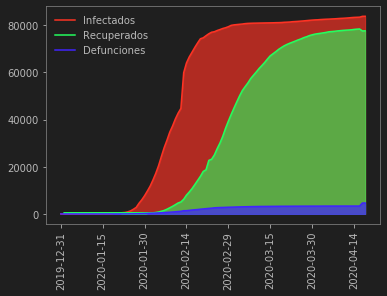

In [58]:
fig = plt.figure()
ax = plt.axes()

plt.plot(df_CHN['date'],df_CHN['total_cases'],color=rojo_cool)
plt.plot(CHN_rec['date'],CHN_rec['recovered'],color=aqua)
plt.plot(df_CHN['date'],df_CHN['total_deaths'],color=azuloso)


plt.fill_between(df_CHN['date'],df_CHN['total_cases'], color=rojo_cool, alpha=.65)
plt.fill_between(list(CHN_rec['date']),list(CHN_rec['recovered']), color=aqua, alpha=.6)
plt.fill_between(df_CHN['date'],df_CHN['total_deaths'], color=azuloso, alpha=.7)


fig.patch.set_facecolor(negro_cool)
plt.xticks(rotation='vertical')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_facecolor(negro_cool)
ax.tick_params(colors=blanco_cool)
ax.spines['bottom'].set_color(gris_cool)
ax.spines['top'].set_color(gris_cool)
ax.spines['right'].set_color(gris_cool)
ax.spines['left'].set_color(gris_cool)

l = ax.legend(['Infectados', 'Recuperados', 'Defunciones'],facecolor=negro_cool, framealpha=1,edgecolor = negro_cool)
for text in l.get_texts():
    text.set_color(blanco_cool)

plt.show()

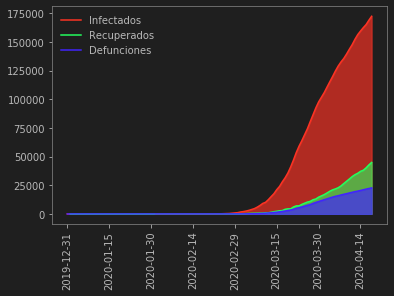

In [59]:
#ax = plt.axes()
#ax.grid()
#ax.set_yscale('log')

fig = plt.figure()
ax = plt.axes()

plt.plot(df_IT['date'],df_IT['total_cases'],color=rojo_cool)
plt.plot(IT_rec['date'],IT_rec['recovered'],color=aqua)
plt.plot(df_IT['date'],df_IT['total_deaths'],color=azuloso)


plt.fill_between(df_IT['date'],df_IT['total_cases'], color=rojo_cool, alpha=.65)
plt.fill_between(list(IT_rec['date']),list(IT_rec['recovered']), color=aqua, alpha=.6)
plt.fill_between(df_IT['date'],df_IT['total_deaths'], color=azuloso, alpha=.7)


fig.patch.set_facecolor(negro_cool)
plt.xticks(rotation='vertical')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_facecolor(negro_cool)
ax.tick_params(colors=blanco_cool)
ax.spines['bottom'].set_color(gris_cool)
ax.spines['top'].set_color(gris_cool)
ax.spines['right'].set_color(gris_cool)
ax.spines['left'].set_color(gris_cool)

l = ax.legend(['Infectados', 'Recuperados', 'Defunciones'],facecolor=negro_cool, framealpha=1,edgecolor = negro_cool)
for text in l.get_texts():
    text.set_color(blanco_cool)

plt.show()

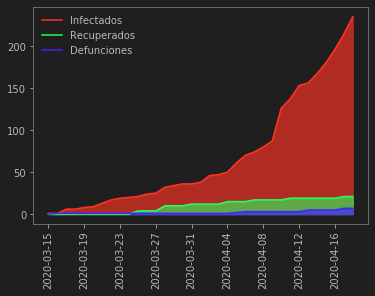

In [60]:
fig = plt.figure()
ax = plt.axes()
#ax.grid()


plt.plot(df_GTM['date'],df_GTM['total_cases'],color=rojo_cool)
plt.plot(GTM_rec['date'],GTM_rec['recovered'],color=aqua)
plt.plot(df_GTM['date'],df_GTM['total_deaths'],color=azuloso)


plt.fill_between(df_GTM['date'],df_GTM['total_cases'], color=rojo_cool, alpha=.65)
plt.fill_between(list(GTM_rec['date']),list(GTM_rec['recovered']), color=aqua, alpha=.6)
plt.fill_between(df_GTM['date'],df_GTM['total_deaths'], color=azuloso, alpha=.7)


fig.patch.set_facecolor(negro_cool)
plt.xticks(rotation='vertical')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_facecolor(negro_cool)
ax.tick_params(colors=blanco_cool)
ax.spines['bottom'].set_color(gris_cool)
ax.spines['top'].set_color(gris_cool)
ax.spines['right'].set_color(gris_cool)
ax.spines['left'].set_color(gris_cool)
#legend = plt.legend()
#frame = legend.get_frame()
#frame.set_facecolor(gris_cool)
#frame.set_linewidth(0)
l = ax.legend(['Infectados', 'Recuperados', 'Defunciones'],facecolor=negro_cool, framealpha=1,edgecolor = negro_cool)
for text in l.get_texts():
    text.set_color(blanco_cool)


plt.show()



In [61]:
#list(GTM_temp['date'])
#GTM_temp = GTM_rec.iloc[10:,:]
#plt.plot(np.arange(0,34,1),np.array(GTM_rec[0:]))

In [62]:
#